In [28]:
# Magic home
%cd /home/benjamin/git/swiss-river-network-benchmark/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from swissrivernetwork.benchmark.ray_evaluation_embedding_space import experiment_analysis_lowd

# nicer labels for plots
label = dict()
label['concatenation_embedding'] = 'Concatenation'
label['concatenation_embedding_output'] = 'Output Concatenation'
label['embedding_gate_memory'] = 'Gated Memory'
label['embedding_gate_hidden'] = 'Gated State'
label['interpolation_embedding'] = 'α-regulated'
label['swiss-1990'] = 'Swiss 1990'
label['swiss-2010'] = 'Swiss 2010'
label['zurich'] = 'Zurich'
    
# Variables
GRAPH_NAME = ['swiss-1990', 'swiss-2010', 'zurich'][0]
METHODS = ['concatenation_embedding', 'concatenation_embedding_output', 'embedding_gate_memory', 'embedding_gate_hidden', 'interpolation_embedding']
#METHODS = ['concatenation_embedding', 'embedding_gate_memory', 'embedding_gate_hidden', 'interpolation_embedding']
#METHODS = ['concatenation_embedding', 'interpolation_embedding']
METRIC = ['RMSE', 'MAE', 'NSE'][1]
EXPORT_PGF = False




/home/benjamin/git/swiss-river-network-benchmark


In [29]:
import os
from ray.tune import ExperimentAnalysis

# get the resulting experiment



In [30]:
from itertools import product
# Read all runs and sort them by validation_mse

def summarize_top(trials_df, top_n):
    # assume trials_df is sorted ascending
    top = trials_df.head(top_n)
    stats = {
        "mean": top["validation_mse"].mean(),
        "median": top["validation_mse"].median(),
        "std": top["validation_mse"].std(),
        "min": top["validation_mse"].min(),
        "max": top["validation_mse"].max(),
    }
    return top[["trial_id", "validation_mse", "config/batch_size", "config/window_len", "config/learning_rate", "config/embedding_size", "config/hidden_size"]], stats

def summarize_by_embedding_size(trials_df, embedding_size, top_n):
    trials = trials_df[trials_df["config/embedding_size"] == embedding_size]
    top = trials.head(top_n)
    stats = {
        "mean": top["validation_mse"].mean(),
        "median": top["validation_mse"].median(),
        "std": top["validation_mse"].std(),
        "min": top["validation_mse"].min(),
        "max": top["validation_mse"].max(),
    }
    return stats

def epoch_stats(trial_dfs, epoch):
    epoch_mses = []
    for key in dfs.keys():
        if len(dfs[key]) >= epoch:
            epoch_mses.append(dfs[key].iloc[epoch-1]['validation_mse'])
    epoch_mses = [mse for mse in epoch_mses if mse <= 1.5] # filter outliers
    stats = {
        "n": len(epoch_mses),
        "mean": np.mean(epoch_mses),
        "median": np.median(epoch_mses),
        "std": np.std(epoch_mses),
        "min": np.min(epoch_mses),
        "max": np.max(epoch_mses),        
    }
    return stats

for method in METHODS:    
    analysis = experiment_analysis_lowd(GRAPH_NAME, method)        
    df = analysis.dataframe(metric="validation_mse", mode="min")
    df = df.sort_values("validation_mse").reset_index(drop=True)

    #df.info()
    print(f"~~~ Stats for {method}: ~~~")

    #for head in [1, 10, 30, 50, 80, 100]:
    for head in [1, 10]:
        top_head, stats_head = summarize_top(df, head)
        print(f'Stats (Top {head})', stats_head)
    


~~~ Stats for concatenation_embedding: ~~~
Stats (Top 1) {'mean': 0.41273122461279854, 'median': 0.41273122461279854, 'std': nan, 'min': 0.41273122461279854, 'max': 0.41273122461279854}
Stats (Top 10) {'mean': 0.42210998906812164, 'median': 0.4224274413572857, 'std': 0.005590424090677776, 'min': 0.41273122461279854, 'max': 0.4296282972791232}
~~~ Stats for concatenation_embedding_output: ~~~
Stats (Top 1) {'mean': 0.7083974502747878, 'median': 0.7083974502747878, 'std': nan, 'min': 0.7083974502747878, 'max': 0.7083974502747878}
Stats (Top 10) {'mean': 0.7155150735459757, 'median': 0.715777322940994, 'std': 0.0030329938764876415, 'min': 0.7083974502747878, 'max': 0.7187639095354825}
~~~ Stats for embedding_gate_memory: ~~~
Stats (Top 1) {'mean': 0.41157914645737037, 'median': 0.41157914645737037, 'std': nan, 'min': 0.41157914645737037, 'max': 0.41157914645737037}
Stats (Top 10) {'mean': 0.4245782601530664, 'median': 0.4264780459343456, 'std': 0.006429055823505398, 'min': 0.4115791464573

In [31]:

for method in METHODS:    
    analysis = experiment_analysis_lowd(GRAPH_NAME, method)        
    df = analysis.dataframe(metric="validation_mse", mode="min")
    df = df.sort_values("validation_mse").reset_index(drop=True)

    #df.info()
    print(f"~~~ Stats for {method}: ~~~")

    print(f'~~~ per Embedding Size ~~~')

    for embedding_size, head in product([1, 2, 5], [1, 10]):
        stats_embeddings = summarize_by_embedding_size(df, embedding_size, head)
        print(f'Stats (Embs: {embedding_size}, Top {head})', stats_embeddings)


~~~ Stats for concatenation_embedding: ~~~
~~~ per Embedding Size ~~~
Stats (Embs: 1, Top 1) {'mean': 0.43885578075423837, 'median': 0.43885578075423837, 'std': nan, 'min': 0.43885578075423837, 'max': 0.43885578075423837}
Stats (Embs: 1, Top 10) {'mean': 0.47650164327351374, 'median': 0.47426428066683, 'std': 0.02500560001552449, 'min': 0.43885578075423837, 'max': 0.5286302340682596}
Stats (Embs: 2, Top 1) {'mean': 0.4201202560507227, 'median': 0.4201202560507227, 'std': nan, 'min': 0.4201202560507227, 'max': 0.4201202560507227}
Stats (Embs: 2, Top 10) {'mean': 0.4316467575263232, 'median': 0.43166432860016357, 'std': 0.008084796930168394, 'min': 0.4201202560507227, 'max': 0.4423891685146373}
Stats (Embs: 5, Top 1) {'mean': 0.41273122461279854, 'median': 0.41273122461279854, 'std': nan, 'min': 0.41273122461279854, 'max': 0.41273122461279854}
Stats (Embs: 5, Top 10) {'mean': 0.4260388897178927, 'median': 0.4293131275480846, 'std': 0.008215732902239804, 'min': 0.41273122461279854, 'max':

In [32]:


# Analyze Specific Epoch:
for method in METHODS:
    analysis = experiment_analysis_lowd(GRAPH_NAME, method)
    #df = analysis.dataframe()
    dfs = analysis.trial_dataframes
    #print(dfs.keys())
    print(f"~~~ Epoch Stats for {method}: ~~~")

    for epoch in range(1, 51):
        stats = epoch_stats(dfs, epoch)
        print(f'Stats (Epoch {epoch})', stats)
    

    




~~~ Epoch Stats for concatenation_embedding: ~~~
Stats (Epoch 1) {'n': 48, 'mean': 0.6591116913738612, 'median': 0.6295507492613979, 'std': 0.12747801950226595, 'min': 0.48876875871792436, 'max': 1.090654500410892}
Stats (Epoch 2) {'n': 49, 'mean': 0.575210965327011, 'median': 0.5492862700775731, 'std': 0.12821419869657721, 'min': 0.4467321938718669, 'max': 1.2386583101470023}
Stats (Epoch 3) {'n': 49, 'mean': 0.5318086545751668, 'median': 0.5078365919471253, 'std': 0.08526943524524173, 'min': 0.4361837515607476, 'max': 0.9479885239852592}
Stats (Epoch 4) {'n': 49, 'mean': 0.5161608084709602, 'median': 0.491983188141603, 'std': 0.07670193332722314, 'min': 0.4318359927274287, 'max': 0.8423299656715244}
Stats (Epoch 5) {'n': 48, 'mean': 0.5166827202653318, 'median': 0.4915785585617414, 'std': 0.08481716496687298, 'min': 0.42234607378486544, 'max': 0.8608592374948785}
Stats (Epoch 6) {'n': 47, 'mean': 0.5282690640120331, 'median': 0.4892369371955283, 'std': 0.1482922230476699, 'min': 0.42

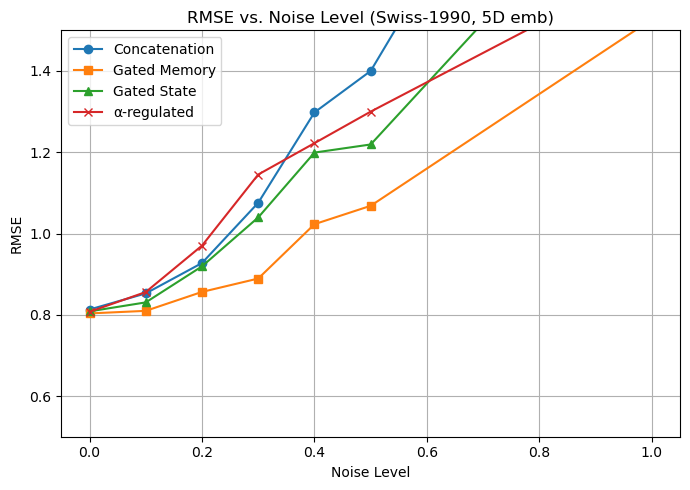

In [ ]:
# Visualize Noise Test Performance (copy results from ray_evaluation_embedding)
# 5d for fairer embedding noise.

# Swiss-1990

noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]

rmse_concatenation_embedding = [0.8129992,  0.85265034, 0.9274078,  1.0756959, 1.29803, 1.4000828, 2.5598924]
rmse_embedding_gate_memory =   [0.8033994,  0.8097128,  0.85632336, 0.8892455, 1.02298, 1.0682302, 1.5270967]
rmse_embedding_gate_hidden =   [0.808421,   0.8305573,  0.9192497,  1.0396017, 1.1991854, 1.2191641, 1.9694678]                                 
rmse_interpolation_embedding = [0.80744135, 0.8560007,  0.9702616,  1.1452154, 1.2223815, 1.30, 1.6613518]

plt.figure(figsize=(7, 5))

plt.plot(noise_levels, rmse_concatenation_embedding, marker='o', label=label['concatenation_embedding'])
plt.plot(noise_levels, rmse_embedding_gate_memory, marker='s', label=label['embedding_gate_memory'])
plt.plot(noise_levels, rmse_embedding_gate_hidden, marker='^', label=label['embedding_gate_hidden'])
plt.plot(noise_levels, rmse_interpolation_embedding, marker='x', label=label['interpolation_embedding'])

plt.ylim(0.5, 1.5)

plt.title("RMSE vs. Noise Level (Swiss-1990, 5D emb)")
plt.xlabel("Noise Level")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


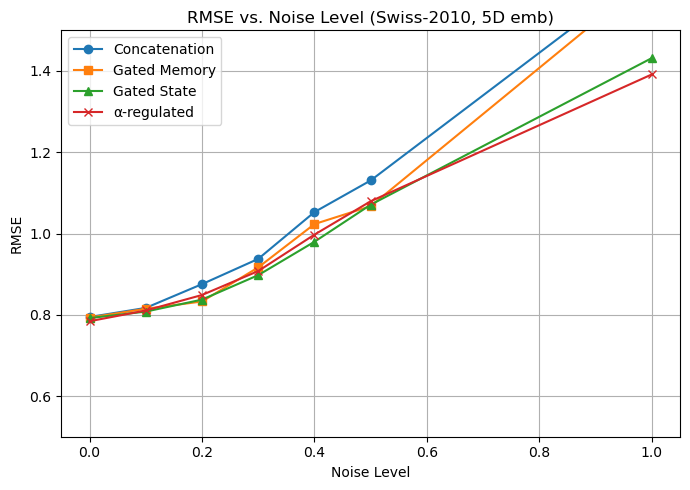

In [34]:
# Visualize Noise Test Performance (copy results from ray_evaluation_embedding)
# 5d for fairer embedding noise.

# Swiss-2010

noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]

rmse_concatenation_embedding = [0.7945798, 0.81695664, 0.87545073, 0.9375886, 1.052813, 1.1306452, 1.6544781]
rmse_embedding_gate_memory =   [0.7932166, 0.81475526, 0.83275044,  0.91667026, 1.0232855, 1.0673221, 1.6347945]
rmse_embedding_gate_hidden =   [0.7918845, 0.8079209, 0.83734953, 0.8975687, 0.97977346, 1.0709444, 1.4318105]
rmse_interpolation_embedding = [0.7841944, 0.81059843, 0.8487266, 0.90768385, 0.9972933, 1.0794278, 1.3916109]

plt.figure(figsize=(7, 5))

plt.plot(noise_levels, rmse_concatenation_embedding, marker='o', label=label['concatenation_embedding'])
plt.plot(noise_levels, rmse_embedding_gate_memory, marker='s', label=label['embedding_gate_memory'])
plt.plot(noise_levels, rmse_embedding_gate_hidden, marker='^', label=label['embedding_gate_hidden'])
plt.plot(noise_levels, rmse_interpolation_embedding, marker='x', label=label['interpolation_embedding'])

plt.ylim(0.5, 1.5)

plt.title("RMSE vs. Noise Level (Swiss-2010, 5D emb)")
plt.xlabel("Noise Level")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
